# Chapter IV: Physics-Informed Neural Networks for Material Characterization

## IV.1 PINNs for Continuum Mechanics

### IV.1.3 Implementation details: Plate under sinusoidal body-load

In [ ]:
# Visualization of the analytical solution
import matplotlib.pyplot as plt 
import scienceplots
plt.style.use(['science', 'grid'])
import phd.models.cm.analytical_plate as ap
from phd.plot.plot_cm import plot_field
import numpy as np
import os
from phd.plot import get_current_config as plt_cfg, book_config, book_compact_config, A4_config
book_config.set_as_current()

# Configuration
save_fig = True
results_folder = '../results/IV_MaterialCharacterization'

Using backend: jax
Other supported backends: tensorflow.compat.v1, tensorflow, pytorch, paddle.
paddle supports more examples now and is recommended.
Enable just-in-time compilation with XLA.



In [7]:
# body load simplification
import sympy as sp

# Symbols
x, y = sp.symbols('x y', real=True)
lam, mu, Q = sp.symbols('lambda mu Q', real=True)

# Original fx
fx_orig = (
    -lam * (-sp.pi*Q*y**3*sp.cos(sp.pi*x) + 4*sp.pi**2 * sp.sin(sp.pi*y)*sp.cos(2*sp.pi*x))
  - mu  * (-sp.pi*Q*y**3*sp.cos(sp.pi*x) +     sp.pi**2 * sp.sin(sp.pi*y)*sp.cos(2*sp.pi*x))
  - 8*sp.pi**2*mu * sp.sin(sp.pi*y)*sp.cos(2*sp.pi*x)
)

# Original fy
fy_orig = (
    lam * (-3*Q*y**2*sp.sin(sp.pi*x) + 2*sp.pi**2*sp.sin(2*sp.pi*x)*sp.cos(sp.pi*y))
  + mu  * ( (sp.pi**2*Q*y**4)/16 * sp.sin(sp.pi*x) - 6*Q*y**2*sp.sin(sp.pi*x) )
  + 2*sp.pi**2*mu*sp.sin(2*sp.pi*x)*sp.cos(sp.pi*y)
)

# Compact fx
fx_compact = (
    (lam + mu)*sp.pi*Q*y**3*sp.cos(sp.pi*x)
    - (4*sp.pi**2*lam + 9*sp.pi**2*mu) * sp.sin(sp.pi*y)*sp.cos(2*sp.pi*x)
)

# Compact fy
fy_compact = (
    Q*((sp.pi**2*mu*y**4)/16 - (3*lam + 6*mu)*y**2)*sp.sin(sp.pi*x)
    + 2*sp.pi**2*(lam + mu)*sp.sin(2*sp.pi*x)*sp.cos(sp.pi*y)
)

# Simplify the differences
fx_check = sp.simplify(fx_orig - fx_compact)
fy_check = sp.simplify(fy_orig - fy_compact)

print("fx difference =", fx_check)
print("fy difference =", fy_check)

fx difference = 0
fy difference = 0


W1202 22:31:22.232079 3359401 cuda_executor.cc:1802] GPU interconnect information not available: INTERNAL: NVML doesn't support extracting fabric info or NVLink is not used by the device.
W1202 22:31:22.236539 3358650 cuda_executor.cc:1802] GPU interconnect information not available: INTERNAL: NVML doesn't support extracting fabric info or NVLink is not used by the device.


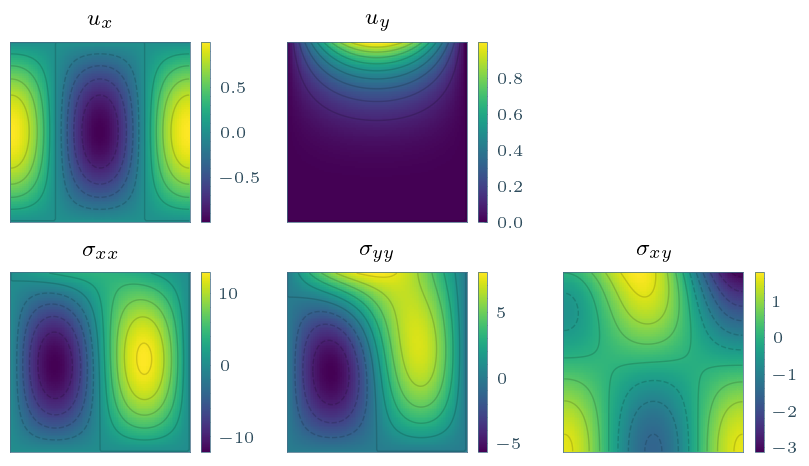

In [2]:
x_lin = np.linspace(0, 1, 100)
Xmesh, Ymesh = np.meshgrid(x_lin, x_lin, indexing="ij")
X_input = [x_lin.reshape(-1, 1), x_lin.reshape(-1, 1)]
lmbd, mu, Q = ap.DEFAULT_CONFIG['lmbd'], ap.DEFAULT_CONFIG['mu'], ap.DEFAULT_CONFIG['Q']
sol = ap.exact_solution(X_input, lmbd, mu, Q)

field_names = ap.LATEX_FIELD_NAMES

fig_size = (0.88*plt_cfg().page_width, 0.5*plt_cfg().page_width)
fig, axes = plt.subplots(2, 3, figsize=fig_size, dpi=200)
axes[0, 2].set_visible(False)
axes_plot = axes[0, :-1].flatten().tolist() + axes[1, :].flatten().tolist()

for idx, field in enumerate(field_names.keys()):
    ax = axes_plot[idx]
    art = plot_field(
        ax, Xmesh, Ymesh, sol[:, idx].reshape(Xmesh.shape), cmap='viridis', plot_contours=True
    )
    fig.colorbar(art["im"], ax=ax)
    ax.set_title(field_names[field])

plt.tight_layout()

# save figure
if save_fig:
    figure_folder = os.path.join(results_folder, "figures")
    os.makedirs(figure_folder, exist_ok=True)
    os.makedirs(figure_folder+"/pdf", exist_ok=True) 
    figure_name = "analytical_plate_solution"
    fig.savefig(os.path.join(figure_folder, figure_name + ".png"), bbox_inches='tight', dpi=300)
    fig.savefig(os.path.join(figure_folder, "pdf", figure_name + ".pdf"), bbox_inches='tight', dpi=300)

(2, 5)